In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error 

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_csv('../data/Finaldf_Cleaned_3.csv').drop('Unnamed: 0', axis = 1)

In [6]:
df.tail()

,State,County,FIPS,2010:UnemploymentRate,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,LI:2010:percent,OB:2010:percent,pct_male,...,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+,DDP:2010:percent.6,DDP:2012:percent.8,Diabetes_pct_growth_rate
3129,Wyoming,Sweetwater County,56037.0,6.6,0.611787,30.570505,9.862513,23.0,27.4,0.521595,...,0.072133,0.058467,0.040105,0.023340,0.017000,0.009580,0.008500,7.1,8.0,0.140845
3130,Wyoming,Teton County,56039.0,7.7,1.177468,29.174527,7.708971,10.5,13.1,0.525547,...,0.072213,0.049200,0.033100,0.020030,0.015674,0.010844,0.009092,3.9,4.8,0.230769
3131,Wyoming,Uinta County,56041.0,7.0,0.712454,20.220414,12.393224,25.8,29.8,0.504877,...,0.074065,0.065159,0.054494,0.041134,0.033165,0.026017,0.021915,7.4,8.7,0.216216
3132,Wyoming,Washakie County,56043.0,5.9,0.949780,10.915407,11.478387,24.6,24.1,0.498652,...,0.083518,0.063402,0.044950,0.040233,0.026360,0.022475,0.025388,8.5,11.1,0.411765
3133,Wyoming,Weston County,56045.0,4.8,0.550509,17.209949,13.831502,28.5,31.3,0.525805,...,0.093902,0.065300,0.047311,0.024645,0.016550,0.007555,0.004497,8.3,9.8,0.204819


In [21]:
df = df.drop('DDP:2012:percent.8', axis = 1)

In [22]:
df_numeric = df[['2010:UnemploymentRate', 'FFRPTH09',
       'PCT_LACCESS_POP10', 'Poverty Rate 2010', 'LI:2010:percent',
       'OB:2010:percent', 'pct_male', '2010:AgeGroup01:0-4',
       '2010:AgeGroup02:5-9', '2010:AgeGroup03:10-14', '2010:AgeGroup04:15-19',
       '2010:AgeGroup05:20-24', '2010:AgeGroup06:25-29',
       '2010:AgeGroup07:30-34', '2010:AgeGroup08:35-39',
       '2010:AgeGroup09:40-44', '2010:AgeGroup10:45-49',
       '2010:AgeGroup11:50-54', '2010:AgeGroup12:55-59',
       '2010:AgeGroup13:60-64', '2010:AgeGroup14:65-69',
       '2010:AgeGroup15:70-74', '2010:AgeGroup16:75-79',
       '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+', 'DDP:2010:percent.6',
       'Diabetes_pct_growth_rate']]   #dont forget to take out 2012 data!!!!!
df_numeric_no_ages = df[['2010:UnemploymentRate', 'FFRPTH09',
       'PCT_LACCESS_POP10', 'Poverty Rate 2010', 'LI:2010:percent',
       'OB:2010:percent', 'pct_male', 'DDP:2010:percent.6',
        'Diabetes_pct_growth_rate']]

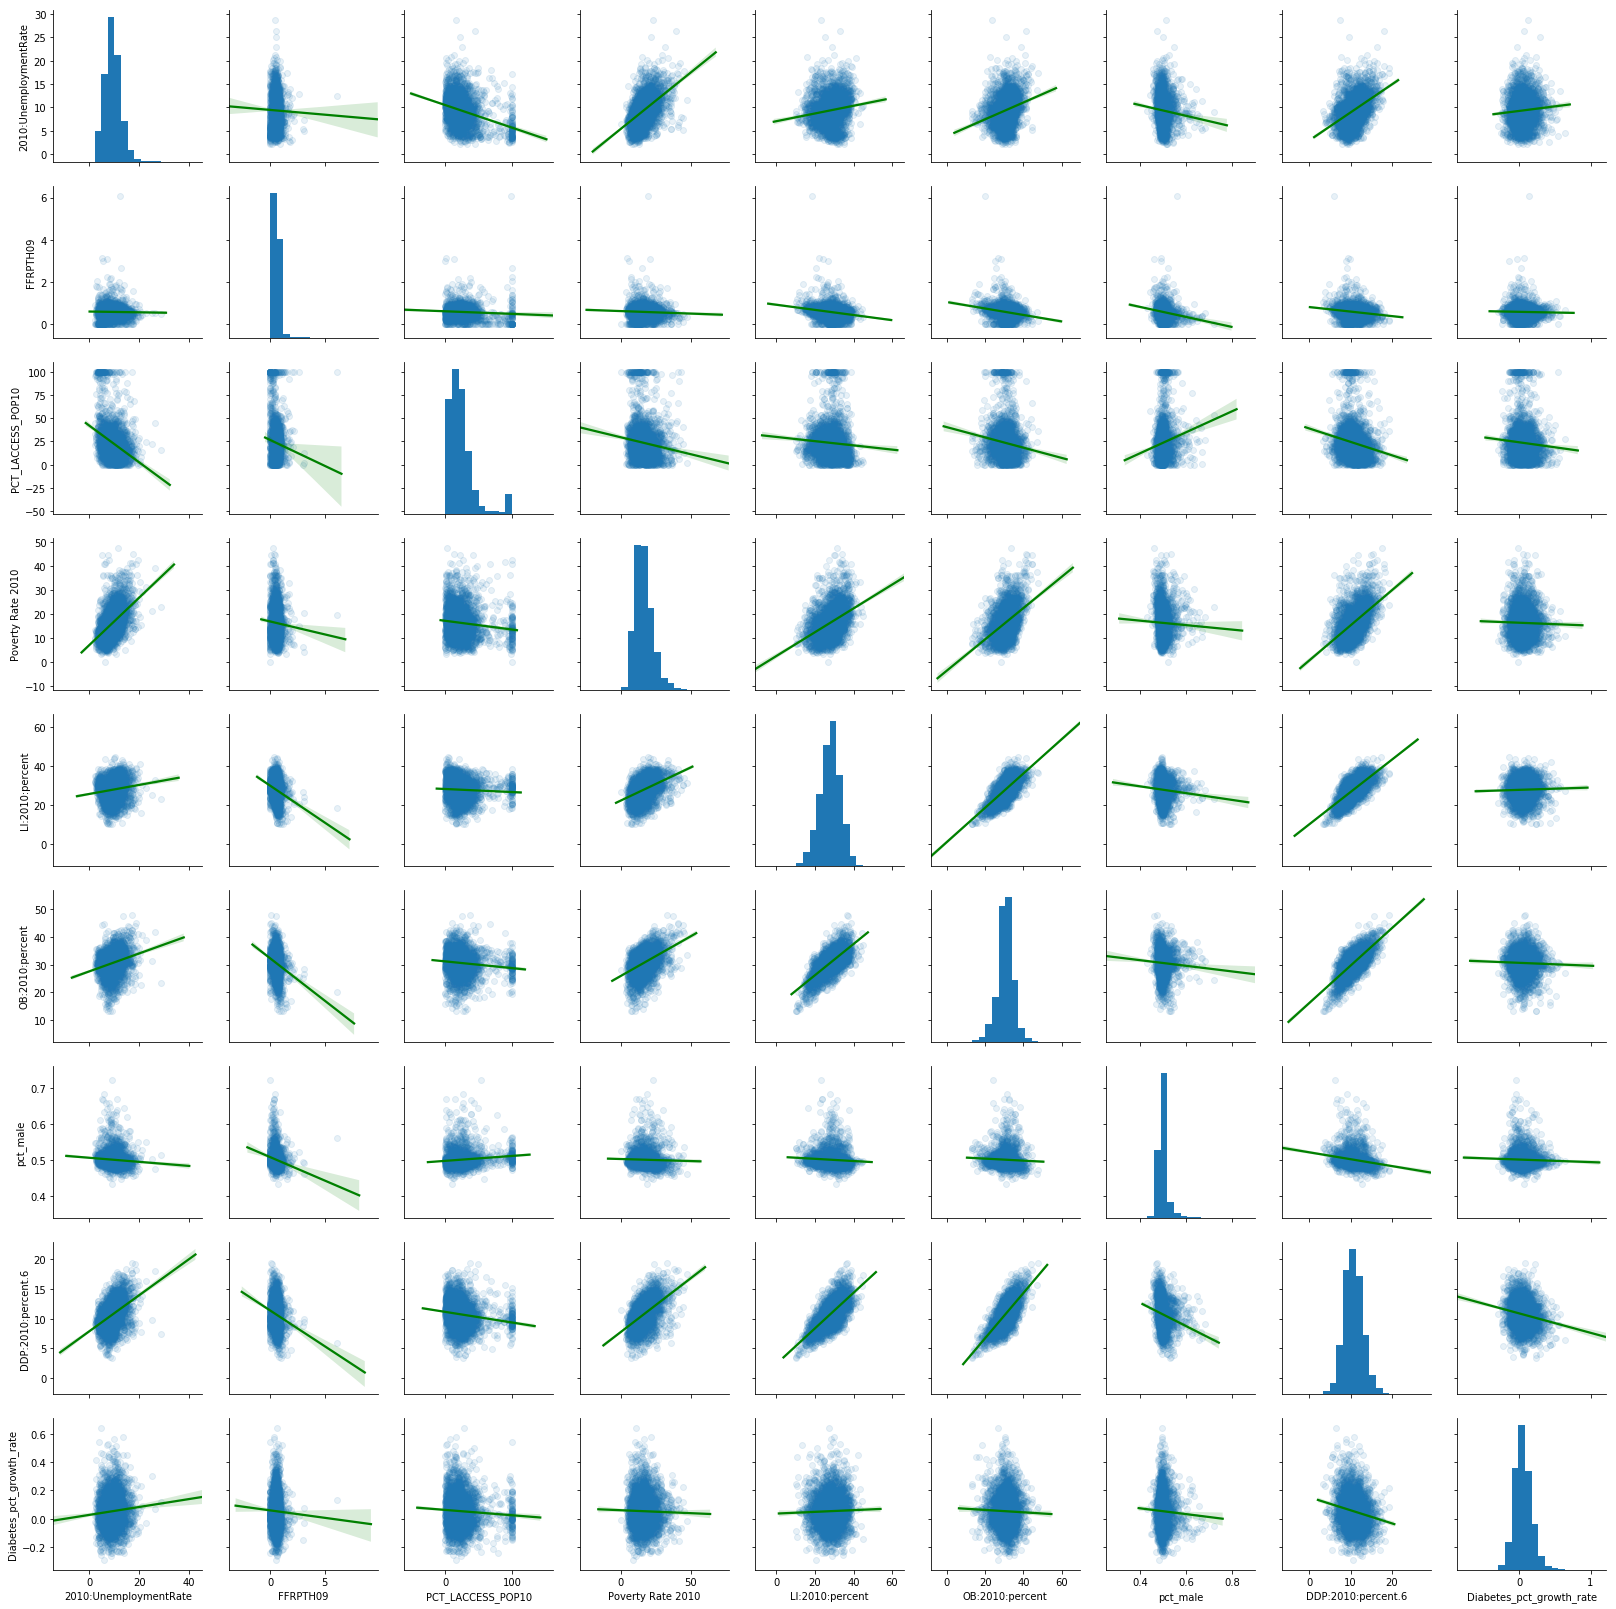

In [26]:
sns.pairplot(df_numeric_no_ages, kind="reg", plot_kws={'line_kws':{'color':'green'}, 'scatter_kws': {'alpha': 0.1}})

### Thoughts:

low activity and obesity VERY CLOSE to actual rate (duplicative?)

In [27]:
s = df_numeric_no_ages.sample(100)

In [28]:
df_plot_no_ages = df_numeric_no_ages.copy()
df_plot_no_ages['Diabetes:High,Med,Low']

In [32]:
low = np.percentile(df_plot_no_ages['Diabetes_pct_growth_rate'], 33)
med = np.percentile(df_plot_no_ages['Diabetes_pct_growth_rate'], 66)

In [37]:
df_plot_no_ages['Diab_rate_HML'] = [1 if x < low else (2 if x < med else 3) for x in df_plot_no_ages['Diabetes_pct_growth_rate']]

/Users/LB/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/LB/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


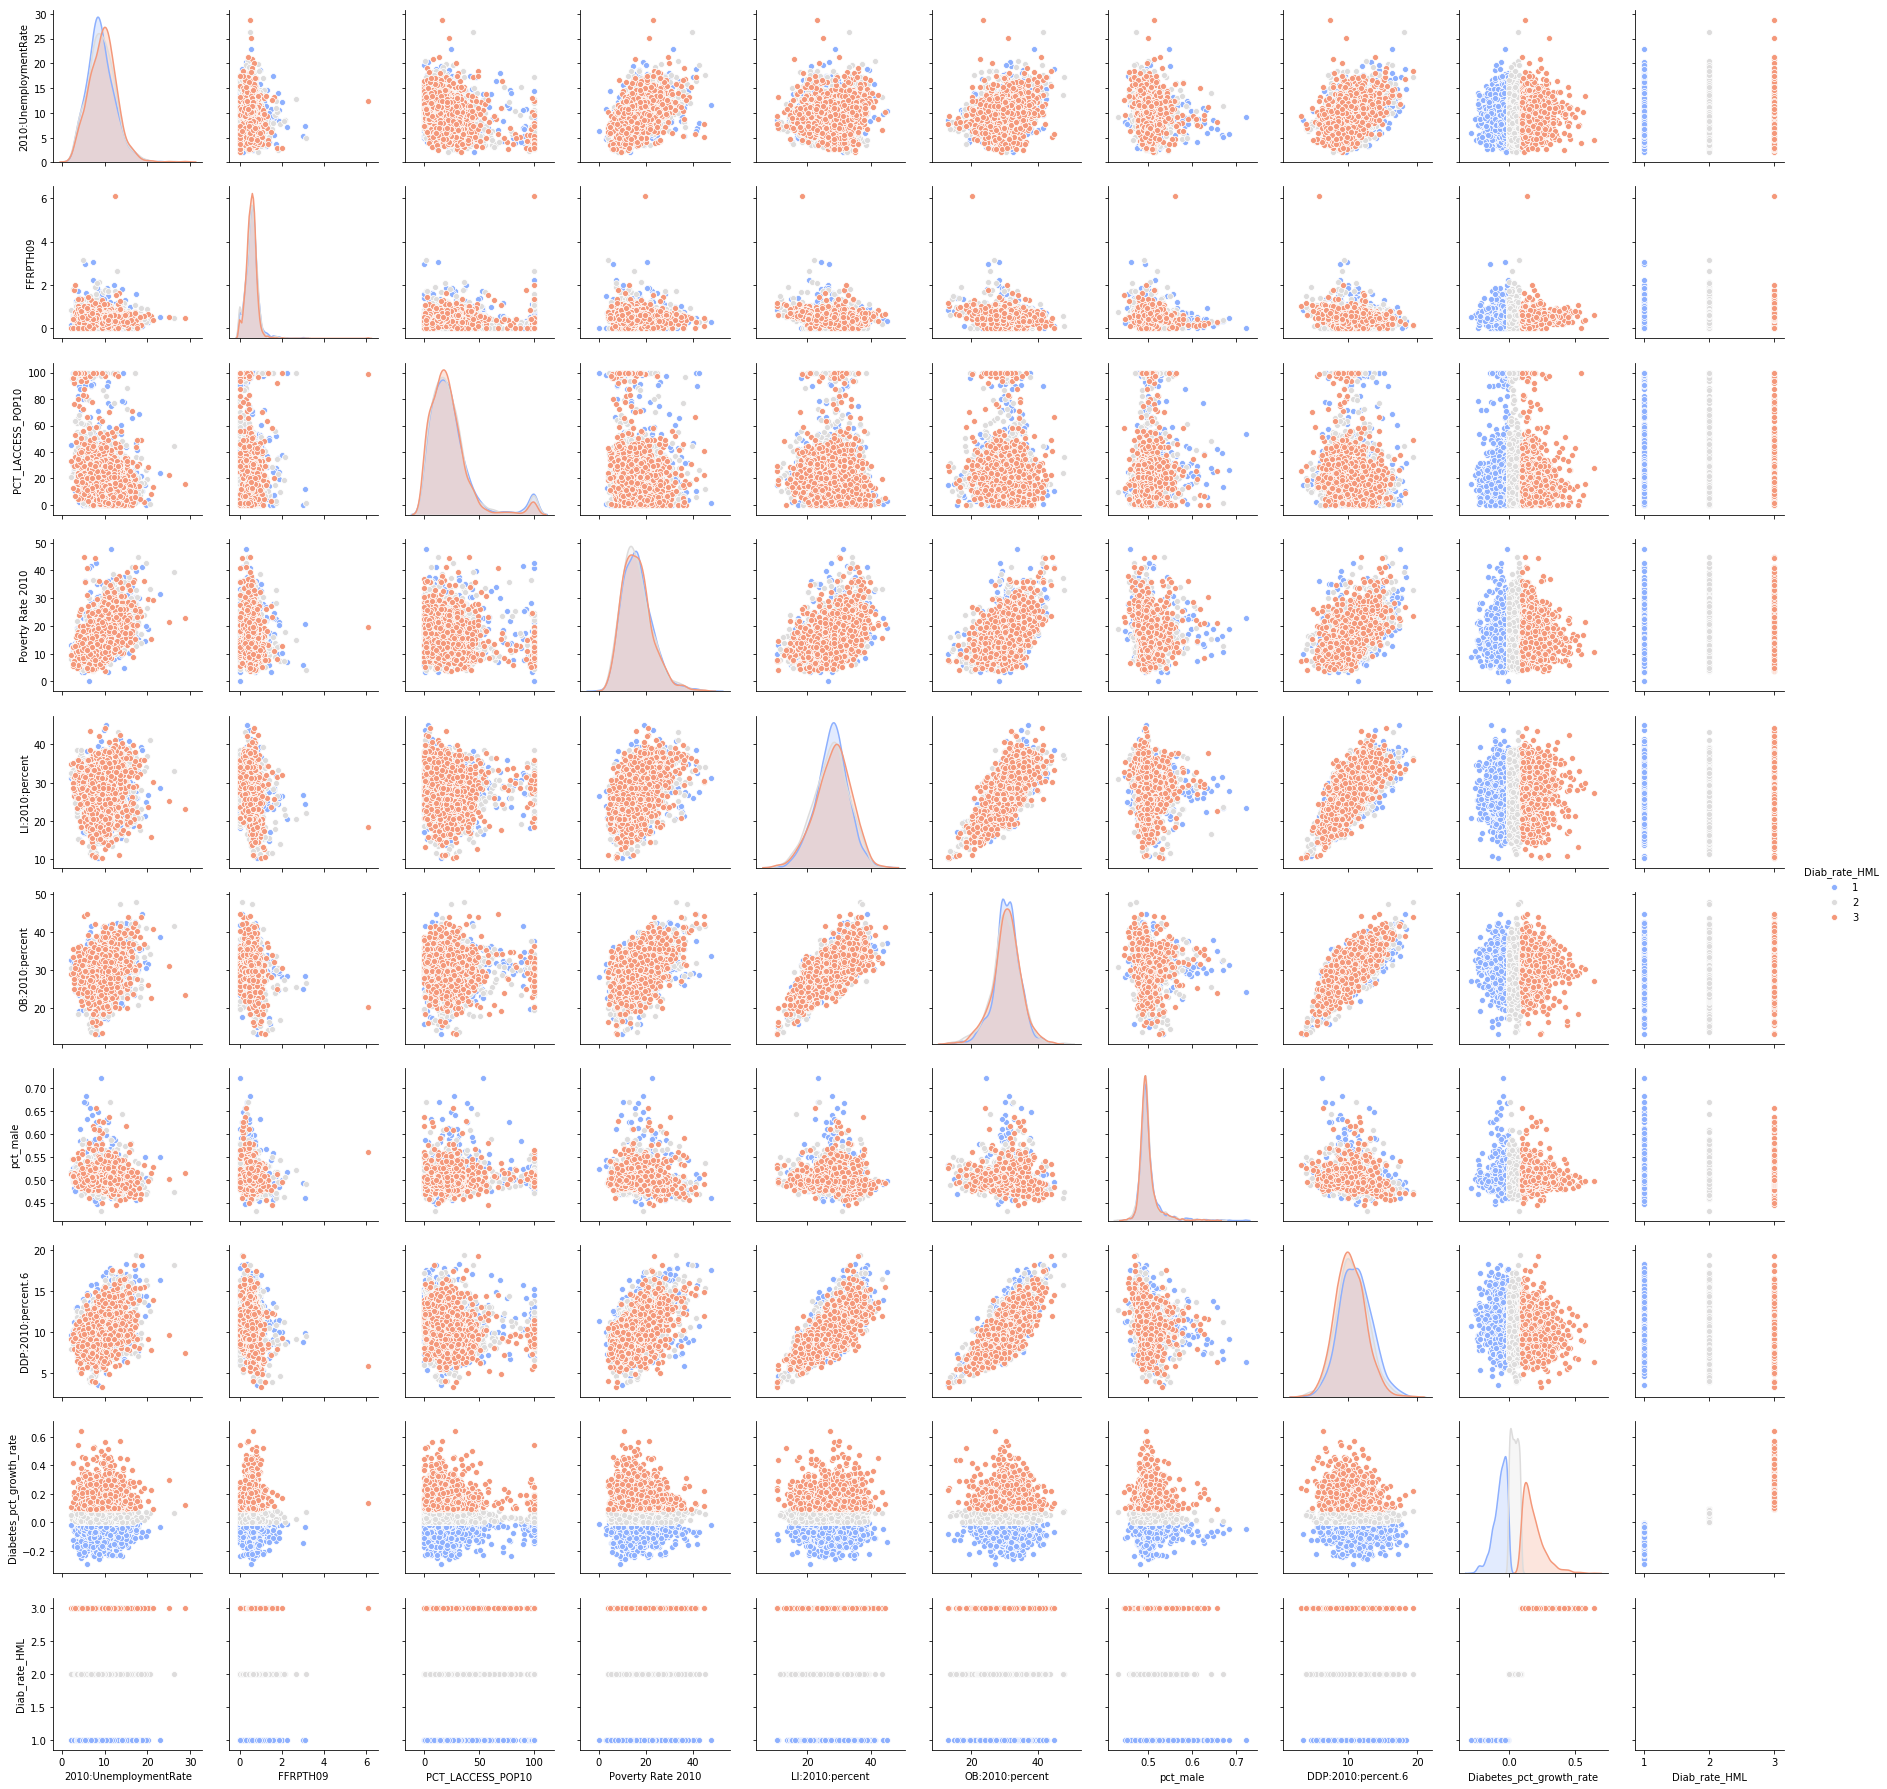

In [38]:
sns.pairplot(df_plot_no_ages, hue='Diab_rate_HML', palette='coolwarm')

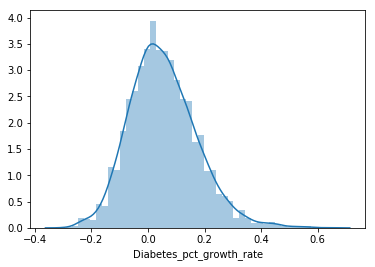

In [39]:
sns.distplot(df['Diabetes_pct_growth_rate'])

Text(0.5,1,'Standard Correlation Matrix')

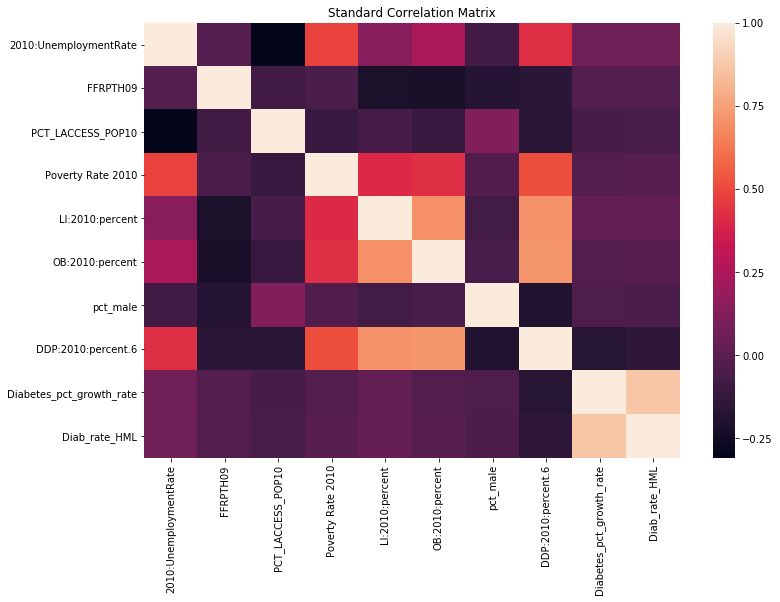

In [41]:
corr = df_plot_no_ages.corr()
corr
plt.figure(figsize = (12, 8))
sns.heatmap(corr)
plt.title("Standard Correlation Matrix")

In [42]:
corr

,2010:UnemploymentRate,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,LI:2010:percent,OB:2010:percent,pct_male,DDP:2010:percent.6,Diabetes_pct_growth_rate,Diab_rate_HML
2010:UnemploymentRate,1.000000,-0.019349,-0.307847,0.487942,0.138270,0.240843,-0.080348,0.426752,0.073752,0.070877
FFRPTH09,-0.019349,1.000000,-0.082671,-0.050684,-0.214952,-0.216555,-0.176205,-0.161121,-0.026441,-0.028549
PCT_LACCESS_POP10,-0.307847,-0.082671,1.000000,-0.115044,-0.059457,-0.115366,0.123904,-0.160354,-0.063304,-0.053590
Poverty Rate 2010,0.487942,-0.050684,-0.115044,1.000000,0.410584,0.431476,-0.032415,0.515283,-0.022260,-0.011238
LI:2010:percent,0.138270,-0.214952,-0.059457,0.410584,1.000000,0.703170,-0.073035,0.705838,0.026798,0.036819
OB:2010:percent,0.240843,-0.216555,-0.115366,0.431476,0.703170,1.000000,-0.053162,0.717104,-0.029699,-0.009947
pct_male,-0.080348,-0.176205,0.123904,-0.032415,-0.073035,-0.053162,1.000000,-0.193766,-0.038094,-0.044313
DDP:2010:percent.6,0.426752,-0.161121,-0.160354,0.515283,0.705838,0.717104,-0.193766,1.000000,-0.174009,-0.144521
Diabetes_pct_growth_rate,0.073752,-0.026441,-0.063304,-0.022260,0.026798,-0.029699,-0.038094,-0.174009,1.000000,0.870522
Diab_rate_HML,0.070877,-0.028549,-0.053590,-0.011238,0.036819,-0.009947,-0.044313,-0.144521,0.870522,1.000000


/Users/LB/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Correlation matrix - no diagonals')

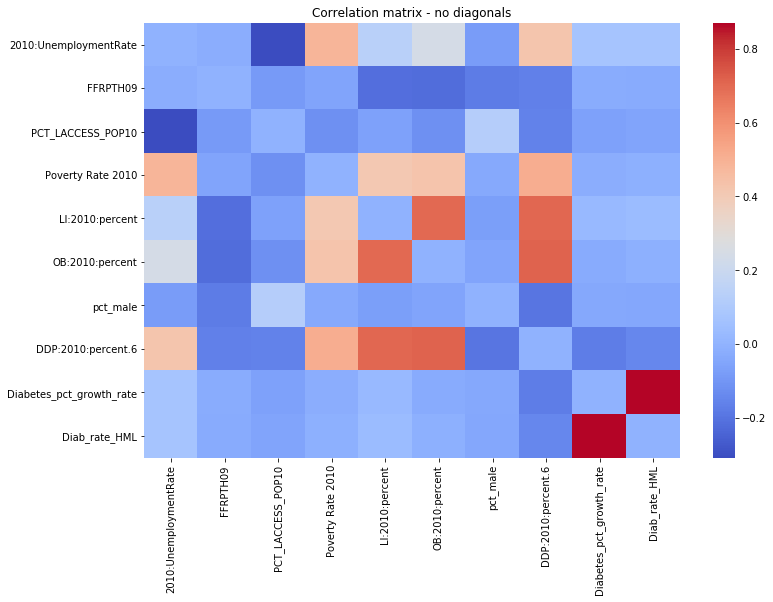

In [43]:
#Plotting when diangonals are zero (to take up less visual weight and balanace out scale)

corr.values[[np.arange(corr.shape[0])]*2] = 0
plt.figure(figsize = (12, 8))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation matrix - no diagonals")

### Thoughts so far!

Li the highest! (...although still pretty terrible)

# Outlier Exploration

In [44]:
df[df['FFRPTH09'] > 6]  #this one outlier is really crazy. for linear regression, removing it. 

,State,County,FIPS,2010:UnemploymentRate,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,LI:2010:percent,OB:2010:percent,pct_male,...,2010:AgeGroup11:50-54,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+,DDP:2010:percent.6,Diabetes_pct_growth_rate
296,Colorado,San Juan County,8111.0,12.5,6.08828,99.24281,19.544846,18.5,20.2,0.560801,...,0.08955,0.083571,0.066042,0.040495,0.013725,0.008697,0.00462,0.002718,5.9,0.135593


In [45]:
df_removed_outliers = df[df['FFRPTH09'] < 6]

# NEXT STEP = Split Training/Test Data

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop(['Diabetes_pct_growth_rate' ], axis = 1)
y = df['Diabetes_pct_growth_rate']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

In [51]:
X_train.tail(10)


,State,County,FIPS,2010:UnemploymentRate,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,LI:2010:percent,OB:2010:percent,pct_male,...,2010:AgeGroup10:45-49,2010:AgeGroup11:50-54,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+,DDP:2010:percent.6
1169,Louisiana,West Feliciana Parish,22125.0,6.7,0.255771,42.283082,15.280395,29.4,34.9,0.656064,...,0.075230,0.074642,0.070267,0.060929,0.048456,0.034089,0.026579,0.016848,0.017763,13.0
763,Indiana,Shelby County,18145.0,11.0,0.404031,10.161947,11.909613,30.6,33.8,0.495544,...,0.083572,0.083190,0.074790,0.066247,0.047871,0.036894,0.027444,0.020857,0.017039,11.4
1845,New York,Kings County,36047.0,9.9,0.651593,0.015700,22.697172,26.2,23.2,0.471664,...,0.081367,0.082106,0.072027,0.054676,0.043342,0.034038,0.030790,0.022225,0.020083,10.2
898,Kansas,Comanche County,20033.0,4.5,0.000000,17.820662,6.219313,30.9,30.4,0.481756,...,0.070998,0.069814,0.065820,0.057613,0.045220,0.035471,0.028036,0.023629,0.025337,11.0
919,Kansas,Hamilton County,20075.0,3.1,0.000000,100.000000,9.695817,24.8,34.0,0.507063,...,0.059496,0.073749,0.077063,0.064634,0.053861,0.052370,0.043752,0.028505,0.038117,8.6
1164,Louisiana,Vernon Parish,22115.0,8.6,0.471485,39.142169,12.648970,29.3,37.5,0.511790,...,0.071956,0.075963,0.069623,0.062352,0.047638,0.035448,0.027264,0.018699,0.015879,11.3
500,Georgia,Rabun County,13241.0,11.8,0.920528,0.711715,23.582626,24.5,29.2,0.493057,...,0.068921,0.083171,0.072807,0.070735,0.051950,0.040938,0.033813,0.024744,0.026817,13.6
2989,West Virginia,Cabell County,54011.0,7.2,1.041233,13.049014,21.281519,31.8,33.9,0.487671,...,0.078930,0.078537,0.080372,0.082470,0.055985,0.044841,0.032909,0.025567,0.022289,13.2
421,Georgia,Crisp County,13081.0,14.2,0.598854,28.241409,31.235728,36.2,33.8,0.478732,...,0.072086,0.078038,0.069681,0.061985,0.048458,0.036253,0.027115,0.018638,0.013648,14.2
1829,New York,Chemung County,36015.0,8.4,0.630283,23.672775,16.022985,25.7,29.2,0.497253,...,0.080116,0.085286,0.072667,0.067239,0.052777,0.039067,0.027716,0.024090,0.022822,11.4


In [52]:
#X_train_try_1_first_10 indices:
#array([1211, 1514, 2503, 2818, 1167, 2986, 2751, 1434, 1729,  897])

#last 10 indices:
#array([1169,  763, 1845,  898,  919, 1164,  500, 2989,  421, 1829])

In [53]:
#WOOO!!! THEY ARE THE SAME!!

In [54]:
X_train.shape, y_train.shape

((2193, 29), (2193,))

In [55]:
#check to see if that one outlier is in this group
X_train[X_train['FFRPTH09'] > 6]

,State,County,FIPS,2010:UnemploymentRate,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,LI:2010:percent,OB:2010:percent,pct_male,...,2010:AgeGroup10:45-49,2010:AgeGroup11:50-54,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+,DDP:2010:percent.6
296,Colorado,San Juan County,8111.0,12.5,6.08828,99.24281,19.544846,18.5,20.2,0.560801,...,0.085474,0.08955,0.083571,0.066042,0.040495,0.013725,0.008697,0.00462,0.002718,5.9


In [56]:
X_train[X_train['FFRPTH09'] > 6].index.values[0]

296

In [57]:
X_train.iloc[296]

State                       North Dakota
County                   Williams County
FIPS                               38105
2010:UnemploymentRate                2.2
FFRPTH09                        0.870761
PCT_LACCESS_POP10                21.3547
Poverty Rate 2010                 8.1298
LI:2010:percent                     32.4
OB:2010:percent                     30.4
pct_male                        0.515582
2010:AgeGroup01:0-4            0.0673905
2010:AgeGroup02:5-9            0.0700525
2010:AgeGroup03:10-14           0.069352
2010:AgeGroup04:15-19          0.0687916
2010:AgeGroup05:20-24          0.0534851
2010:AgeGroup06:25-29          0.0526445
2010:AgeGroup07:30-34          0.0577583
2010:AgeGroup08:35-39          0.0654291
2010:AgeGroup09:40-44          0.0686515
2010:AgeGroup10:45-49           0.073345
2010:AgeGroup11:50-54           0.076007
2010:AgeGroup12:55-59          0.0692469
2010:AgeGroup13:60-64          0.0596848
2010:AgeGroup14:65-69           0.049317
2010:AgeGroup15:

In [58]:
y_train[296]

0.13559322033898302

In [59]:
X_train = X_train.drop(296)
y_train = y_train.drop(296)

In [60]:
X_train.shape

(2192, 29)

In [61]:
y_train.shape

(2192,)

# Model 0: Assume Average for all Counties: MSE

In [67]:
X_train.shape

(2192, 29)

In [68]:
avg = y_train.mean()
avg

0.054594032048708635

In [69]:
y_pred_avg = np.array([avg] * X_train.shape[0])
y_pred_avg

array([0.05459403, 0.05459403, 0.05459403, ..., 0.05459403, 0.05459403,
       0.05459403])

In [70]:
avg_model_mse = mean_squared_error(y_train, y_pred_avg)
avg_model_mse

0.013974801717106095

### MSE of "guess average diabetes rate" model (i.e. no model) = 0.01397 
(ideal = 0)

# Model Group A: Linear Regression

## (Dish): Linear Model with all available numeric

In [62]:
model1 = LinearRegression()

In [64]:
X_train.columns

Index(['State', 'County', 'FIPS', '2010:UnemploymentRate', 'FFRPTH09',
       'PCT_LACCESS_POP10', 'Poverty Rate 2010', 'LI:2010:percent',
       'OB:2010:percent', 'pct_male', '2010:AgeGroup01:0-4',
       '2010:AgeGroup02:5-9', '2010:AgeGroup03:10-14', '2010:AgeGroup04:15-19',
       '2010:AgeGroup05:20-24', '2010:AgeGroup06:25-29',
       '2010:AgeGroup07:30-34', '2010:AgeGroup08:35-39',
       '2010:AgeGroup09:40-44', '2010:AgeGroup10:45-49',
       '2010:AgeGroup11:50-54', '2010:AgeGroup12:55-59',
       '2010:AgeGroup13:60-64', '2010:AgeGroup14:65-69',
       '2010:AgeGroup15:70-74', '2010:AgeGroup16:75-79',
       '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+', 'DDP:2010:percent.6'],
      dtype='object')

In [65]:
feats_numeric = ['2010:UnemploymentRate', 'FFRPTH09',
       'PCT_LACCESS_POP10', 'Poverty Rate 2010', 'LI:2010:percent',
       'OB:2010:percent', 'pct_male', '2010:AgeGroup01:0-4',
       '2010:AgeGroup02:5-9', '2010:AgeGroup03:10-14', '2010:AgeGroup04:15-19',
       '2010:AgeGroup05:20-24', '2010:AgeGroup06:25-29',
       '2010:AgeGroup07:30-34', '2010:AgeGroup08:35-39',
       '2010:AgeGroup09:40-44', '2010:AgeGroup10:45-49',
       '2010:AgeGroup11:50-54', '2010:AgeGroup12:55-59',
       '2010:AgeGroup13:60-64', '2010:AgeGroup14:65-69',
       '2010:AgeGroup15:70-74', '2010:AgeGroup16:75-79',
       '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+', 'DDP:2010:percent.6']

In [66]:
cross_val_mse_1 = cross_val_score(model1, X_train[feats_numeric], y_train, cv=5, scoring = 'neg_mean_squared_error')
print('mean MSE',cross_val_mse_1.mean())
cross_val_mse_1


mean MSE -0.011912724326865725


array([-0.01064378, -0.01171675, -0.0117338 , -0.01342824, -0.01204105])

In [71]:
((-cross_val_mse_1.mean()) - avg_model_mse) / avg_model_mse

-0.14755682634954664

#### MSE of linear model when using all columns -> .0119 --> 14 % better than with avg (no) model.

In [73]:
model1.fit(X_train[feats_numeric], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
model1.coef_

array([ 9.22486096e-03, -2.34813694e-02, -2.04744182e-04, -1.98817718e-04,
        7.85811383e-03,  3.08488025e-03, -6.68370171e-01, -6.13533996e-01,
        1.07461375e-01, -5.42061030e-01,  2.71610729e-01, -8.58822651e-02,
        5.79992227e-02, -4.82660159e-01,  2.54914062e+00, -1.00954715e+00,
       -3.08208049e-02, -5.54643783e-01, -4.16100499e-01,  4.05651165e-01,
       -6.26230376e-01,  9.76103487e-01,  1.25830442e-01, -8.01900282e-01,
        6.69583303e-01, -3.53739780e-02])

In [75]:
import statsmodels.api as sm
X_train_sm_1 = sm.add_constant(X_train[feats_numeric], prepend=False)
mod = sm.OLS(np.array(y_train), np.array(X_train_sm_1))
res = mod.fit()
res.summary()

/Users/LB/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     17.36
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           9.65e-69
Time:                        16:09:56   Log-Likelihood:                 1770.3
No. Observations:                2192   AIC:                            -3489.
Df Residuals:                    2166   BIC:                            -3341.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0092      0.001      9.518      0.000       0.007       0.011
x2            -0.0235      0.009     -2.666      0.008      -0.041      -0.006
x3            -0.0002      0.000     -1.650      0.099      -0.000    3.87e-05
x4            -0.0002      0.000     -0.426      0.670      -0.001       0.001
x5             0.0079      0.001     11.100      0.000       0.006       0.009
x6             0.0031      0.001      3.478      0.001       0.001       0.005
x7            -0.6684      0.113     -5.912      0.000      -0.890      -0.447
x8            -0.5913      0.537     -1.101      0.271      -1.645       0.462
x9             0.1297      0.714      0.182      0.856      -1.271       1.530
x10           -0.5198      0.627     -0.829      0.407      -1.750       0.710
x11            0.2938      0.428      0.686      0.493      -0.546       1.134
x12           -0.0637      0.235     -0.271      0.787      -0.525       0.397
x13            0.0802      0.477      0.168      0.867      -0.856       1.016
x14           -0.4604      0.640     -0.720      0.472      -1.715       0.794
x15            2.5714      0.665      3.868      0.000       1.268       3.875
x16           -0.9873      0.599     -1.649      0.099      -2.162       0.187
x17           -0.0086      0.564     -0.015      0.988      -1.115       1.098
x18           -0.5324      0.588     -0.905      0.366      -1.686       0.622
x19           -0.3939      0.569     -0.693      0.489      -1.509       0.721
x20            0.4279      0.584      0.733      0.463      -0.717       1.572
x21           -0.6040      0.639     -0.945      0.345      -1.857       0.649
x22            0.9983      0.840      1.188      0.235      -0.650       2.646
x23            0.1481      0.937      0.158      0.875      -1.690       1.986
x24           -0.7797      1.030     -0.757      0.449      -2.800       1.240
x25            0.6918      0.655      1.057      0.291      -0.592       1.976
x26           -0.0354      0.002    -18.518      0.000      -0.039      -0.032
const          0.4000      0.060      6.629      0.000       0.282       0.518
==============================================================================
Omnibus:                      102.024   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.086
Skew:                           0.441   Prob(JB):                     2.31e-31
Kurtosis:                       3.877   Cond. No.                     1.10e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.18e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix 

In [76]:
col_indices_small_p = np.argwhere(abs(res.pvalues) < .01)
col_indices_small_p = col_indices_small_p[:-1]  #not counting constant
col_indices_small_p

array([[ 0],
       [ 1],
       [ 4],
       [ 5],
       [ 6],
       [14],
       [25]])

In [78]:
col_names_small_p = X_train[feats_numeric].columns[col_indices_small_p]
col_names_small_p = list(col_names_small_p)
col_names_small_p

['2010:UnemploymentRate',
 'FFRPTH09',
 'LI:2010:percent',
 'OB:2010:percent',
 'pct_male',
 '2010:AgeGroup08:35-39',
 'DDP:2010:percent.6']

###   #5 Using columns which had really low p-values


#### MSE was -0.0119  --> i could essentially go without all the other columns and do the same as all

In [80]:
model2 = LinearRegression()

In [81]:
cross_val_mse_2 = cross_val_score(model2, X_train[col_names_small_p], y_train, cv=5, scoring='neg_mean_squared_error')
print ('mean MSE:', cross_val_mse_2.mean())
cross_val_mse_2

mean MSE: -0.011928237127400182


array([-0.01032553, -0.01177638, -0.01176251, -0.01348071, -0.01229605])

In [82]:
model2.fit(X_train[col_names_small_p], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
model2.coef_

array([ 0.00939667, -0.02113692,  0.00786277,  0.00296883, -0.71956832,
        0.94961339, -0.03459067])

In [84]:
col_names_small_p

['2010:UnemploymentRate',
 'FFRPTH09',
 'LI:2010:percent',
 'OB:2010:percent',
 'pct_male',
 '2010:AgeGroup08:35-39',
 'DDP:2010:percent.6']

In [92]:
for i in zip(col_names_small_p, model2.coef_.round(4)):
    print(i)

('2010:UnemploymentRate', 0.0094)
('FFRPTH09', -0.0211)
('LI:2010:percent', 0.0079)
('OB:2010:percent', 0.003)
('pct_male', -0.7196)
('2010:AgeGroup08:35-39', 0.9496)
('DDP:2010:percent.6', -0.0346)


In [93]:
import statsmodels.api as sm
X_train_sm_2 = sm.add_constant(X_train[col_names_small_p], prepend=False)
mod = sm.OLS(np.array(y_train), np.array(X_train_sm_2))
res = mod.fit()
res.summary()

/Users/LB/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     56.59
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           9.95e-75
Time:                        16:15:53   Log-Likelihood:                 1752.8
No. Observations:                2192   AIC:                            -3490.
Df Residuals:                    2184   BIC:                            -3444.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0094      0.001     11.042      0.000       0.008       0.011
x2            -0.0211      0.009     -2.433      0.015      -0.038      -0.004
x3             0.0079      0.001     11.331      0.000       0.007       0.009
x4             0.0030      0.001      3.421      0.001       0.001       0.005
x5            -0.7196      0.112     -6.442      0.000      -0.939      -0.501
x6             0.9496      0.278      3.417      0.001       0.405       1.495
x7            -0.0346      0.002    -18.591      0.000      -0.038      -0.031
const          0.3427      0.063      5.443      0.000       0.219       0.466
==============================================================================
Omnibus:                      102.705   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.983
Skew:                           0.436   Prob(JB):                     3.29e-32
Kurtosis:                       3.910   Cond. No.                     5.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#plot residuals for everything    ####TOMORROW: PLOT RESIDUALS OF THESE, THEN TOMORROW TRY RANDOM FOREST! FOREST!!!!
## DO REGULARIZATION! MAKE COEFFICENTS MUCH SMALLER!!!


# fig, axs = plt.subplots(3,1, figsize=(8,20))

# axs[0].scatter(X_train[unemp2019], results.resid, alpha = .25)
# axs[0].hlines(0,
#               X_train[unemp2019].min(), 
#               X_train[unemp2019].max(), 
#               'k', linestyle='dashed')
# axs[0].set_xlabel('unemployment rates')
# axs[0].set_ylabel('residuals');

# Model #2 -> Random forest(s)

### Plan:
 - Do one with just numbers  (evaluate with MSE)
 - Do one with *state* also (dummy) 
 - Plot partial dependence plots
 - 

In [109]:
model_r1 = RandomForestRegressor(n_estimators = 1000, oob_score=True)

In [110]:
model_r1.fit(X_train[feats_numeric], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [111]:
#cross_val_score(model_r1, X_train[feats_all_numeric_no_target], y_train, cv = 5)   #default score is R2

In [112]:
# model_r1.oob_score_   #R2

In [113]:
y_pred_rf1 = model_r1.oob_prediction_

In [114]:
rf1_mse = mean_squared_error(y_train, y_pred_rf1)
rf1_mse

0.012208238360420284

In [115]:
( rf1_mse -  avg_model_mse ) /  avg_model_mse

-0.1264106205187455

#### MSE of Random Forest model with all columns  = 0.0122 --> 46% decrease in MSE (=12% improvement!)

In [116]:
## SKIPPING THIS FOR NOW!!!

In [105]:
model_r2 = RandomForestRegressor(n_estimators=30)

In [106]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [108]:
n_iter_search = 20
random_search = RandomizedSearchCV(model_r2, param_distributions=random_grid,
                                   n_iter=n_iter_search, cv=5)
random_search.fit(X_train[feats_numeric], y_train)

KeyboardInterrupt: 

In [ ]:
random_search.best_params_

In [130]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100, 200, 500, 1000]
max_features = ['auto', 'sqrt']
max_depth = [15, 30, None],
min_samples_leaf = [1, 2, 4],

# Maximum number of levels in tree
random_grid2 = {'n_estimators': n_estimators,
               'max_features': max_features,
                'max_depth': max_depth
               }

print(random_grid2)

{'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 30, None]}


In [131]:
n_iter_search = 10
random_search = RandomizedSearchCV(model_r2, param_distributions=random_grid2,
                                   n_iter=n_iter_search, cv=5)

In [132]:
random_search.fit(X_train[feats_numeric], y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 30, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [133]:
random_search.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}

# Model 4: Random Forest with State Dummies

In [117]:
states = pd.get_dummies(X_train['State'], prefix='S:')

In [118]:
X_train.head()

,State,County,FIPS,2010:UnemploymentRate,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,LI:2010:percent,OB:2010:percent,pct_male,...,2010:AgeGroup10:45-49,2010:AgeGroup11:50-54,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+,DDP:2010:percent.6
1211,Massachusetts,Barnstable County,25001.0,9.9,0.990768,50.352994,9.034328,17.5,18.0,0.476423,...,0.079242,0.082016,0.077253,0.071285,0.051921,0.038508,0.033341,0.029759,0.032312,8.6
1514,Missouri,Gentry County,29075.0,7.9,0.890208,3.307962,17.678462,30.0,33.3,0.483526,...,0.066950,0.067187,0.062088,0.053653,0.040920,0.031278,0.026125,0.020769,0.021158,11.3
2503,Tennessee,Sumner County,47165.0,8.9,0.566683,28.204244,9.771492,28.3,29.4,0.487964,...,0.080778,0.073263,0.062114,0.052275,0.039177,0.028143,0.020416,0.012803,0.010134,10.0
2818,Virginia,Appomattox County,51011.0,8.6,0.270051,2.969736,16.420639,28.0,30.4,0.486876,...,0.065541,0.058321,0.054078,0.045355,0.029832,0.018745,0.013996,0.010822,0.013558,12.4
1167,Louisiana,West Baton Rouge Parish,22121.0,7.9,0.685166,16.493161,14.927769,29.3,32.8,0.491761,...,0.071958,0.070234,0.064202,0.060065,0.050586,0.044381,0.034385,0.021113,0.017925,13.0


In [119]:
states.head()

,S:_Alabama,S:_Alaska,S:_Arizona,S:_Arkansas,S:_California,S:_Colorado,S:_Connecticut,S:_Delaware,S:_Florida,S:_Georgia,...,S:_South Dakota,S:_Tennessee,S:_Texas,S:_Utah,S:_Vermont,S:_Virginia,S:_Washington,S:_West Virginia,S:_Wisconsin,S:_Wyoming
1211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2503,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
X_train_states = X_train.drop(['State', "County", 'FIPS'], axis=1).join(states)

X_train_states.columns

Index(['2010:UnemploymentRate', 'FFRPTH09', 'PCT_LACCESS_POP10',
       'Poverty Rate 2010', 'LI:2010:percent', 'OB:2010:percent', 'pct_male',
       '2010:AgeGroup01:0-4', '2010:AgeGroup02:5-9', '2010:AgeGroup03:10-14',
       '2010:AgeGroup04:15-19', '2010:AgeGroup05:20-24',
       '2010:AgeGroup06:25-29', '2010:AgeGroup07:30-34',
       '2010:AgeGroup08:35-39', '2010:AgeGroup09:40-44',
       '2010:AgeGroup10:45-49', '2010:AgeGroup11:50-54',
       '2010:AgeGroup12:55-59', '2010:AgeGroup13:60-64',
       '2010:AgeGroup14:65-69', '2010:AgeGroup15:70-74',
       '2010:AgeGroup16:75-79', '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+',
       'DDP:2010:percent.6', 'S:_Alabama', 'S:_Alaska', 'S:_Arizona',
       'S:_Arkansas', 'S:_California', 'S:_Colorado', 'S:_Connecticut',
       'S:_Delaware', 'S:_Florida', 'S:_Georgia', 'S:_Hawaii', 'S:_Idaho',
       'S:_Illinois', 'S:_Indiana', 'S:_Iowa', 'S:_Kansas', 'S:_Kentucky',
       'S:_Louisiana', 'S:_Maine', 'S:_Maryland', 'S:_Massachuset

In [122]:
model_r3 = RandomForestRegressor(n_estimators = 1000, oob_score=True)

model_r3.fit(X_train_states, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [123]:
y_pred_rf3 = model_r3.oob_prediction_

rf3_mse = mean_squared_error(y_train, y_pred_rf3)
rf3_mse

0.011592332680735262